In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv(r'../data/processed_student_data.csv')
dataset.head()

,study_hours_per_day,prep_days_before_exam,attendance_percentage,internal_marks,internal_marks_weight,subject_difficulty,study_material_source,past_performance,self_study_or_coaching,motivation_level,doubt_resolution_time,exam_anxiety_level,final_exam_marks
0,0.411126,0.200000,0.586072,0.667335,0.314607,3.0,2,0.573000,0,4.0,0.908727,3.0,42.5
1,0.360923,0.600000,0.956124,0.686903,0.359551,4.0,3,0.107714,0,3.0,0.185749,3.0,48.2
2,0.531886,0.533333,0.805825,0.633267,0.494382,3.0,0,0.113429,2,3.0,0.743795,4.0,59.1
3,0.506106,0.022222,0.670836,0.463044,0.561798,4.0,3,0.510571,2,5.0,0.261009,3.0,46.3
4,0.268657,0.355556,0.879761,0.416716,0.370787,3.0,1,0.543857,2,4.0,0.510008,3.0,55.7


In [4]:
x = dataset.iloc[:, :-1]
y = dataset['final_exam_marks']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [8]:
lr =LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [9]:
lr.score(x_test, y_test)*100

77.983483797722

In [10]:
la = Lasso(alpha=0.002)
la.fit(x_train, y_train)

Lasso(alpha=0.002)

In [11]:
la.score(x_test, y_test) * 100

77.97467361080454

In [12]:
ri = Ridge(alpha=32)
ri.fit(x_test,y_test)

Ridge(alpha=32)

In [13]:
ri.score(x_test, y_test) * 100

71.92479248897286

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
mean_squared_error(y_test, lr.predict(x_test))

31.092266605264648

In [16]:
mean_absolute_error(y_test, lr.predict(x_test))

4.416386169151994

In [17]:
r2_score(y_test, lr.predict(x_test))

0.77983483797722

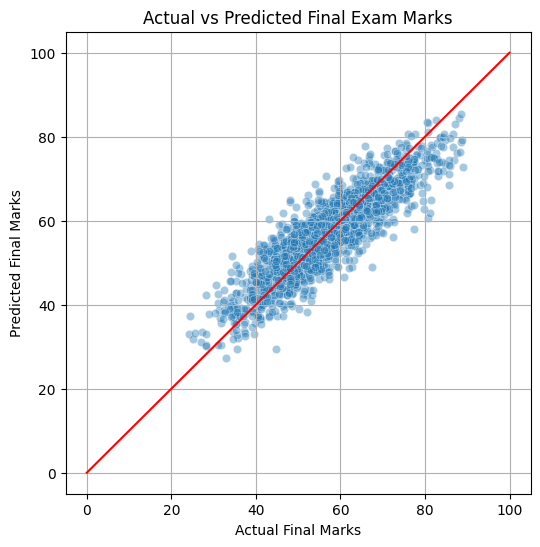

In [18]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=lr.predict(x_test), alpha=0.4)
plt.xlabel("Actual Final Marks")
plt.ylabel("Predicted Final Marks")
plt.title("Actual vs Predicted Final Exam Marks")
plt.plot([0, 100], [0, 100], color='red')
plt.grid()
plt.show()


In [19]:
import joblib

In [20]:
joblib.dump(lr, '../app/model.pkl')

['../app/model.pkl']

In [21]:
lr.predict([[0.411126,	0.200000,	0.586072,	0.667335,	0.314607,	3.0,	2,	0.573000,	0,	4.0,	0.908727,	3.0	]])

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([49.28600264])